In [1]:
# Changing working directory to load csv file correctly
import os
os.chdir('/Users/kai23/Library/Mobile Documents/com~apple~CloudDocs/MSc Data Science/Skills for DS/Skills Assessment 2')
print("Working Directory Changed To:", os.getcwd())

Working Directory Changed To: /Users/kai23/Library/Mobile Documents/com~apple~CloudDocs/MSc Data Science/Skills for DS/Skills Assessment 2


In [2]:
import pandas as pd

# Loading the cleaned_authors dataset
authors = pd.read_csv('./outputs/authors_cleaned.csv')

# Inspecting the data
print(authors.info())
print(authors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56892 entries, 0 to 56891
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PMID               56892 non-null  int64 
 1   AuthorN            56892 non-null  int64 
 2   AuthorForename     56892 non-null  object
 3   AuthorLastname     56892 non-null  object
 4   AuthorInitials     56815 non-null  object
 5   AuthorAffiliation  56268 non-null  object
 6   AuthorsPerPaper    56892 non-null  int64 
 7   AuthorFullName     56892 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.5+ MB
None
       PMID  AuthorN AuthorForename AuthorLastname AuthorInitials  \
0  10545039        1            K E       Morrison             KE   
1  10545039        2              G         Steers              G   
2  10545039        3              V       Dubowitz              V   
3  10558867        1            M L         Brandi             ML   
4  10558867        2  

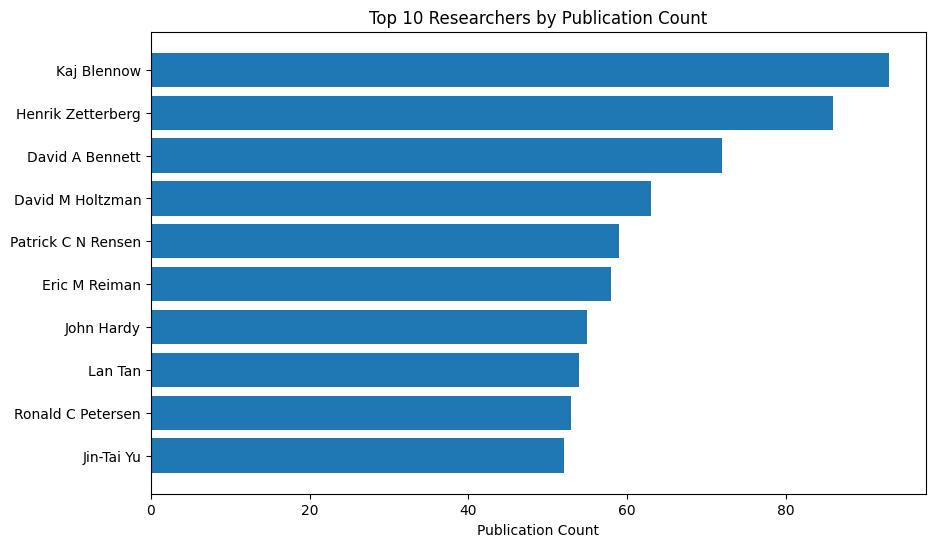

In [23]:
import matplotlib.pyplot as plt

# Counting number of papers per author
publications = authors.groupby('AuthorFullName')['PMID'].nunique().reset_index()
publications.columns = ['AuthorFullName', 'PublicationCount']

# Sorting by the number of publications
top_authors = publications.sort_values(by='PublicationCount', ascending=False)

# Plotting top 10 authors with the most publications
top_10_authors = top_authors.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_authors['AuthorFullName'], top_10_authors['PublicationCount'], color = 'tab:blue')
plt.xlabel('Publication Count')
plt.title('Top 10 Researchers by Publication Count')
plt.gca().invert_yaxis()
plt.savefig('./outputs/top_10_researchers.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

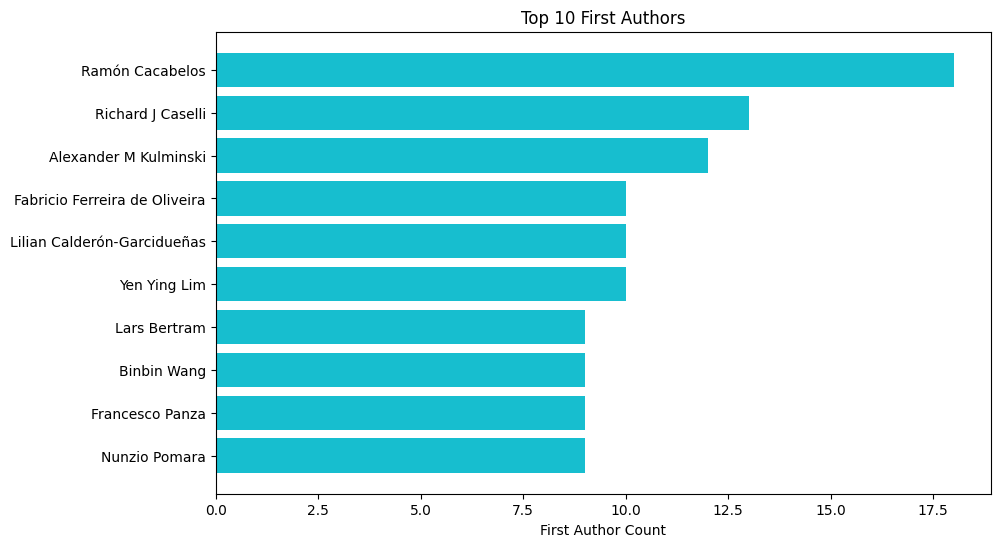

In [24]:
# Filter for first authors in publications
first_authors = authors[authors['AuthorN'] == 1]

# Counting the number of first author papers
first_publications = first_authors.groupby('AuthorFullName')['PMID'].nunique().reset_index()
first_publications.columns = ['AuthorFullName', 'FirstAuthorCount']

# Sort by first authors
top_first_authors = first_publications.sort_values(by='FirstAuthorCount', ascending=False)

top_10_first = top_first_authors.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_first['AuthorFullName'], top_10_first['FirstAuthorCount'], color = 'tab:cyan')
plt.xlabel('First Author Count')
plt.title('Top 10 First Authors')
plt.gca().invert_yaxis()
plt.savefig('./outputs/top_10_first_authors.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

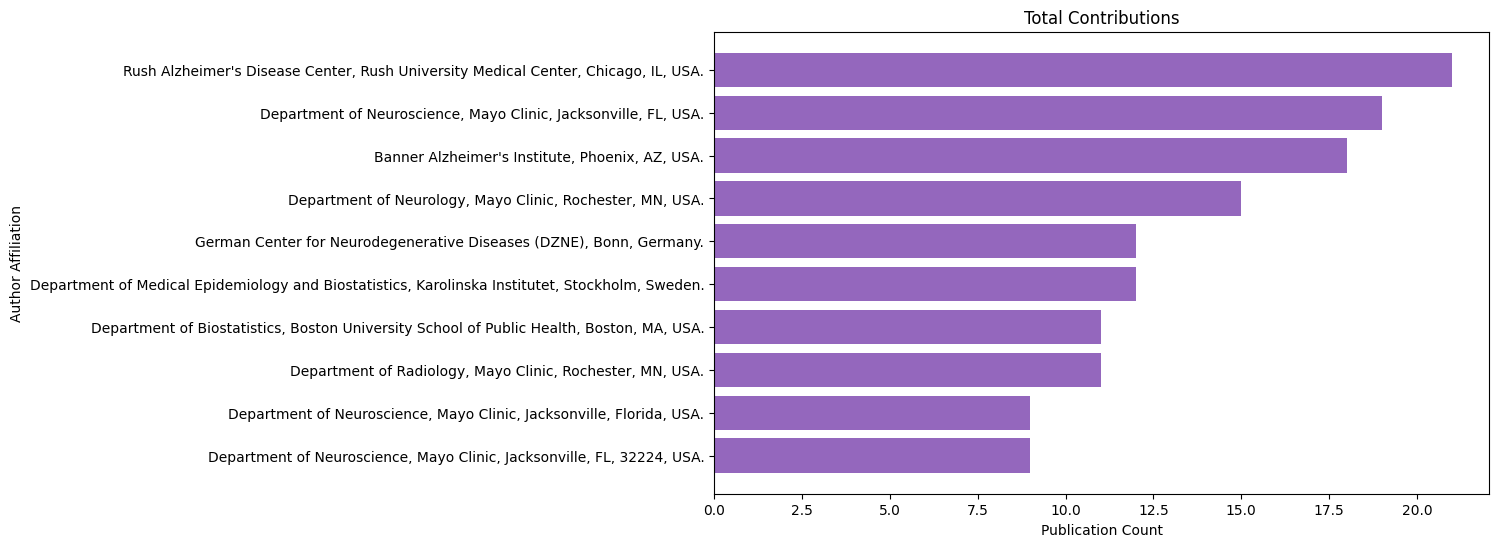

In [25]:
# Group by affiliation
affiliations = authors.groupby('AuthorAffiliation')['PMID'].nunique().reset_index()
affiliations.columns = ['AuthorAffiliation', 'TotalContributions']

# Plotting the data
top_10_affiliations = affiliations.sort_values(by='TotalContributions', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_affiliations['AuthorAffiliation'], top_10_affiliations['TotalContributions'], color = 'tab:purple')
plt.ylabel('Author Affiliation')
plt.xlabel('Publication Count')
plt.title('Total Contributions')
plt.gca().invert_yaxis()
plt.savefig('./outputs/affiliation_contributions.png', format='png', dpi=300, bbox_inches='tight')
plt.show()